In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

jam = pd.read_csv('jam.csv', header=None)
jam2 = pd.read_csv('jam_2.csv', header=None)
jam3 = pd.read_csv('jam_3.csv', header=None)
jam4 = pd.read_csv('jam_4.csv', header=None)
box = pd.read_csv('box.csv', header=None)

In [3]:
def load_first_frame(path, height=480, width=848):
    flat = pd.read_csv(path, header=None).values.flatten()
    frame_size = height * width

    if len(flat) % frame_size != 0:
        raise ValueError(f"File {path} cannot be evenly split into {height}x{width} frames.")

    frame_count = len(flat) // frame_size
    frames = flat.reshape((frame_count, height, width))
    return frames[0]  # or choose another frame, e.g., frames[-1] for last


In [8]:
jam1 = load_first_frame('jam.csv')
jam2 = load_first_frame('jam_2.csv')
jam3 = load_first_frame('jam_3.csv')
jam4 = load_first_frame('jam_4.csv')
box = load_first_frame('box.csv')

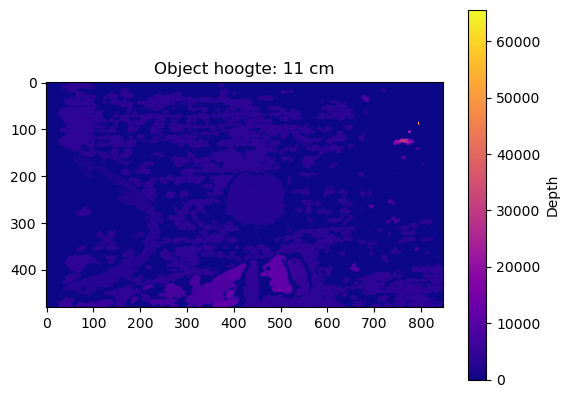

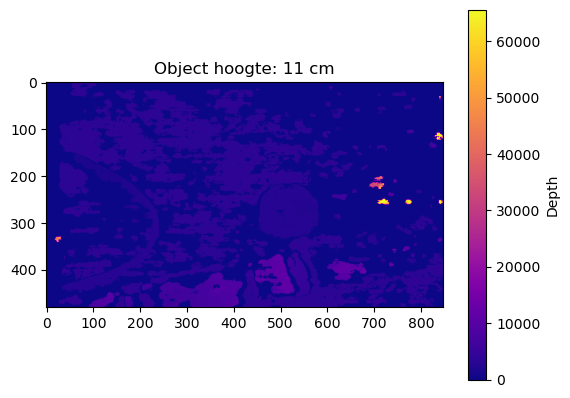

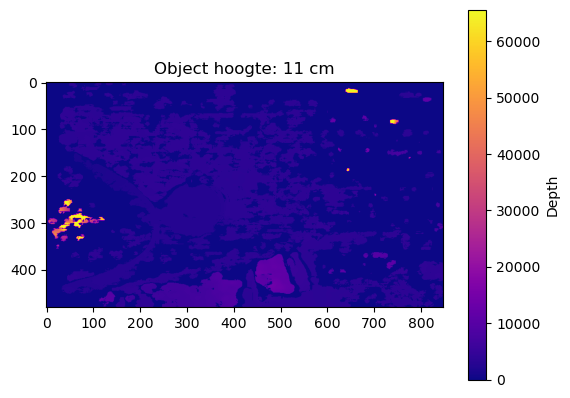

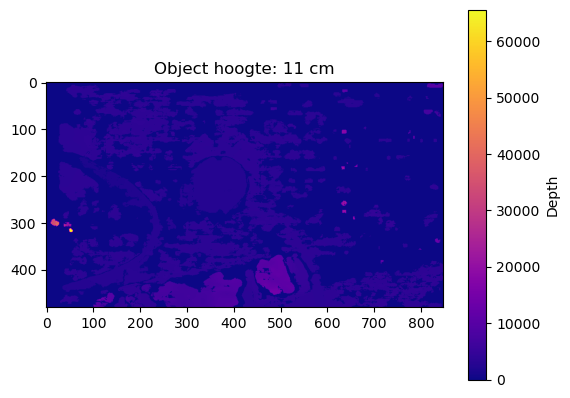

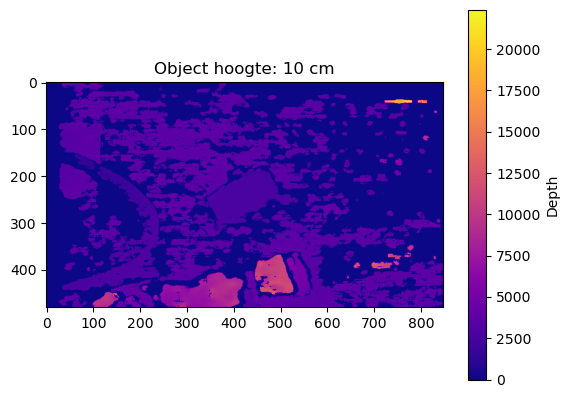

In [25]:
objects = [jam1, jam2, jam3, jam4, box]
x = [424, 525, 300, 350, 400]
y = [250, 300, 275, 225, 250]

max_depth = 37 # cm


for i in range(len(objects)):
    object = objects[i]
    object_depth = object[y[i], x[i]] / 100
    object_height = max_depth - object_depth
    plt.imshow(object, cmap='plasma')
    plt.colorbar(label='Depth')
    plt.title(f"Object hoogte: {round(object_height)} cm")
    plt.show()



